In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\AAPL.csv',parse_dates=['Date'])
#data.Date=pd.to_datetime(data.Date)
#data=data.sort_values(by='Date')
data.set_index('Date',inplace=True)
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-28,155.789993,156.330002,153.660004,156.300003,153.986359,26192100
2019-01-29,156.250000,158.130005,154.110001,154.679993,152.390320,41587200
2019-01-30,163.250000,166.149994,160.229996,165.250000,162.803864,61109800
2019-01-31,166.110001,169.000000,164.559998,166.440002,163.976242,40739600
2019-02-01,166.960007,168.979996,165.929993,166.520004,164.055069,32668100


In [2]:
data['2019-01'] #we can get data of a single month
#data['2019-01'].Close.mean() #average stock prices in January

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-28,155.789993,156.330002,153.660004,156.300003,153.986359,26192100
2019-01-29,156.250000,158.130005,154.110001,154.679993,152.390320,41587200
2019-01-30,163.250000,166.149994,160.229996,165.250000,162.803864,61109800
2019-01-31,166.110001,169.000000,164.559998,166.440002,163.976242,40739600


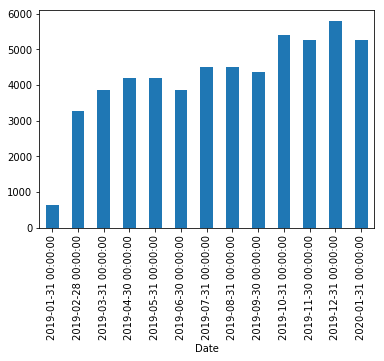

In [3]:
data.loc['2019-01-01':'2019-01-31'] #finding data in a range
ser=data.Close.resample('M').sum() #sum of the Closing price on the basis of months
%matplotlib inline
ser.plot(kind="bar") #kind="bar"

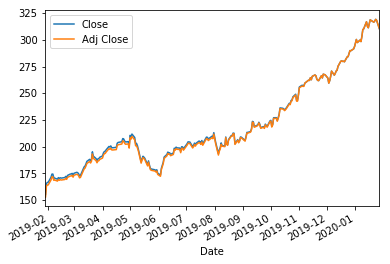

In [4]:
data[['Close','Adj Close']].plot()

2019-01-01    5
2019-01-02    8
2019-01-03    7
2019-01-04    2
2019-01-07    8
2019-01-08    4
2019-01-09    3
2019-01-10    8
2019-01-11    6
2019-01-14    8
2019-01-15    9
2019-01-16    9
2019-01-17    8
2019-01-18    7
2019-01-21    5
2019-01-22    8
2019-01-23    2
2019-01-24    9
2019-01-25    9
2019-01-28    2
2019-01-29    5
2019-01-30    4
2019-01-31    6
2019-02-01    1
2019-02-04    2
2019-02-05    7
2019-02-06    4
2019-02-07    3
2019-02-08    5
2019-02-11    4
             ..
2019-02-28    3
2019-03-01    6
2019-03-04    7
2019-03-05    6
2019-03-06    4
2019-03-07    3
2019-03-08    5
2019-03-11    5
2019-03-12    3
2019-03-13    2
2019-03-14    3
2019-03-15    3
2019-03-18    1
2019-03-19    5
2019-03-20    3
2019-03-21    1
2019-03-22    3
2019-03-25    7
2019-03-26    2
2019-03-27    6
2019-03-28    5
2019-03-29    9
2019-04-01    1
2019-04-02    1
2019-04-03    7
2019-04-04    7
2019-04-05    7
2019-04-08    8
2019-04-09    8
2019-04-10    5
Freq: B, Length: 72, dty

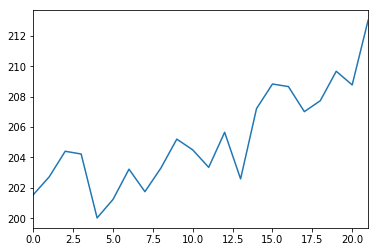

In [5]:
data2=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\AAPL.csv',parse_dates=['Date'])
data2.set_index('Date',inplace=True)
data2=data2['2019-07-01':'2019-07-31']
data2.to_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\AAPL2.csv',index=False)
data3=pd.read_csv(r'C:\Users\JOY STARK\Desktop\Datasets\apple historical data\AAPL2.csv')
data3.head()
rng=pd.date_range(start='2019-01-01',end='2019-01-05',freq='B')
#idx=pd.DatetimeIndex(rng)
data3.reindex(rng)
data3.Close.plot()
data.asfreq('D',method='pad')['2019-02'] #shows daily datas where missing datas are filled with the method='pad'
rng2=pd.date_range(start='2019-01-01',periods=72,freq='B')
pd.Series(np.random.randint(1,10,len(rng2)),index=rng2)

In [6]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar,nearest_workday,Holiday
usb=CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb 
rng=pd.date_range(start='2019-07-01',end='2019-07-31',freq=usb)
rng
class MyOwnCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday("Joy's Birthday", month=3, day=18, observance=nearest_workday)# observance=nearest_workday
    ]
bd=CustomBusinessDay(calendar=MyOwnCalendar(),weekmask='Sun Mon Tue Wed Thu',holidays=['2019-03-17'])
rng=pd.date_range(start='2020-03-01',end='2020-03-31',freq=bd)
rng
import numpy as np
series=pd.Series(np.random.randn(len(rng)),rng)
series.tz_localize(tz='Asia/Dhaka')

2020-03-01 00:00:00+06:00   -0.481827
2020-03-02 00:00:00+06:00    0.234187
2020-03-03 00:00:00+06:00    0.036185
2020-03-04 00:00:00+06:00    1.640596
2020-03-05 00:00:00+06:00   -1.435431
2020-03-08 00:00:00+06:00    1.012328
2020-03-09 00:00:00+06:00    0.785752
2020-03-10 00:00:00+06:00   -1.105978
2020-03-11 00:00:00+06:00   -0.056138
2020-03-12 00:00:00+06:00   -0.392252
2020-03-15 00:00:00+06:00   -0.359303
2020-03-16 00:00:00+06:00    1.495531
2020-03-17 00:00:00+06:00    0.276680
2020-03-19 00:00:00+06:00   -0.100608
2020-03-22 00:00:00+06:00    1.127347
2020-03-23 00:00:00+06:00   -1.495989
2020-03-24 00:00:00+06:00   -0.708434
2020-03-25 00:00:00+06:00    0.668708
2020-03-26 00:00:00+06:00    1.394935
2020-03-29 00:00:00+06:00   -1.133995
2020-03-30 00:00:00+06:00    1.281296
2020-03-31 00:00:00+06:00   -0.457321
Freq: C, dtype: float64

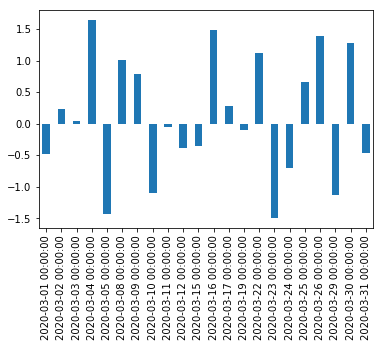

In [7]:
series.plot(kind='bar')

Date
2019-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2019-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2019-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: Q-DEC, Name: Close, dtype: object

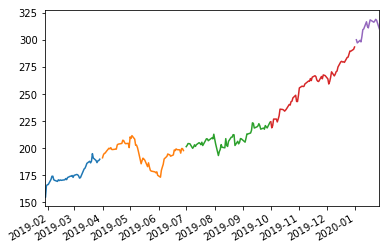

In [8]:
data.Close.resample('Q').plot()

In [9]:
y=pd.Period('2016')
y.week
m=pd.Period('2020-03',freq='M')
m.week
d=pd.Period('2020-03-01',freq='D')
d.week
h=pd.Period('2020-03-01 00:00',freq='H')
h+pd.offsets.Hour(5) # h+5 works
q=pd.Period('2019Q1') #Fiscal year ending in December
q+1
q=pd.Period('2019Q1',freq='Q-JAN')
q.start_time
q.end_time
mn=q.asfreq('M',how='end') #Converting one frequency to another frequency
q2=pd.Period('2019Q2',freq='Q-JAN')
q2-q
idx=pd.period_range('2017','2019',freq='Q-JAN')
idx
import numpy as np
ps=pd.Series(np.random.randn(len(idx)),idx)
ps=ps.to_timestamp()

In [11]:
ps=ps.tz_localize(tz='Asia/Dhaka') #to make it time awared
ps

2016-11-01 00:00:00+06:00   -0.423271
2017-02-01 00:00:00+06:00   -1.368480
2017-05-01 00:00:00+06:00    0.416331
2017-08-01 00:00:00+06:00    0.574404
2017-11-01 00:00:00+06:00    1.218712
2018-02-01 00:00:00+06:00    0.811455
2018-05-01 00:00:00+06:00   -0.115427
2018-08-01 00:00:00+06:00   -0.528597
2018-11-01 00:00:00+06:00    1.846570
Freq: QS-NOV, dtype: float64

In [ ]:
from pytz import all_timezones
all_timezones
daterangefunctionwithtimezone=pd.date_range(start='2019-01-01',periods=72,freq='B',tz='Asia/Dhaka')
daterangefunctionwithtimezone
daterangefunctionwithtimezoneusingdateutil=pd.date_range(start='2019-01-01',periods=72,freq='B',tz='dateutil/Asia/Dhaka')
daterangefunctionwithtimezoneusingdateutil
#Difference between pytz and dateutil is: dateutil uses timezones from the operating system while pytz uses timezones which are predefined


In [97]:
#shifting
import numpy as np
data=pd.DataFrame({
    'name':['John','Joy','Samin','Kashpiya','Volgertz'],
    'stock_pt':[25,23,23,22,24]
})
data=data.set_index('name')
#data.shift(1) #shifts the graph by 1 unit right
#data.shift(-1) #shifts the graph by 1 unit left
data['prevstock_pt']=data.shift(1)
r,c=data.shape
rng=pd.date_range(start='2020-01-01',periods=r,freq='B',tz='Europe/Berlin')
data.reset_index()
data['date']=rng
data=data.reset_index()
data=data.set_index('date')
data['change in price']=data['stock_pt']-data['prevstock_pt']
data

,name,stock_pt,prevstock_pt,change in price
date,,,,
2020-01-01 00:00:00+01:00,John,25,NaN,NaN
2020-01-02 00:00:00+01:00,Joy,23,25.0,-2.0
2020-01-03 00:00:00+01:00,Samin,23,23.0,0.0
2020-01-06 00:00:00+01:00,Kashpiya,22,23.0,-1.0
2020-01-07 00:00:00+01:00,Volgertz,24,22.0,2.0


In [ ]:
data.tshift(1) #shifting the datetimes by 1
data.tshift(-1) #shifting the datetimes by -1

In [107]:
import numpy as np
ranges=pd.period_range('2011','2017',freq='Q')
DataSeries=pd.Series(np.random.randn(len(ranges)),ranges)
DataSeries=DataSeries.to_timestamp() #converting to timestamp
DataSeries.to_period() #converting to period
Dataframe=pd.DataFrame({
    'Revenue':[115960,126567,123455,12456],
    'Expenses':[11233,11234,11234,10102],
    'Profit':[60,70,100,110]
})
Dataframe['Line Item']=pd.period_range('2017',periods=4,freq='Q')
Dataframe=Dataframe.set_index('Line Item')
Dataframe.index=Dataframe.index.to_timestamp()
Dataframe
#Dataframe.index=pd.PeriodIndex(Dataframe.index,freq='Q-JAN')
Dataframe.index=Dataframe.index.to_period()
Dataframe['start time']=list(map(lambda x:x.start_time,Dataframe.index))
Dataframe['end time']=list(map(lambda x: x.end_time,Dataframe.index))
Dataframe.index=Dataframe.index.to_timestamp()
Dataframe=Dataframe.tz_localize('US/Eastern')
from pytz import all_timezones
all_timezones
Dataframe.tz_convert('Asia/Dhaka')
%matplotlib inline

,Revenue,Expenses,Profit,start time,end time
Line Item,,,,,
2017-01-01 00:00:00-05:00,115960,11233,60,2017-01-01,2017-03-31 23:59:59.999999999
2017-04-01 00:00:00-04:00,126567,11234,70,2017-04-01,2017-06-30 23:59:59.999999999
2017-07-01 00:00:00-04:00,123455,11234,100,2017-07-01,2017-09-30 23:59:59.999999999
2017-10-01 00:00:00-04:00,12456,10102,110,2017-10-01,2017-12-31 23:59:59.999999999
